In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-stability-lobe3/data_chatter (1).csv


In [2]:
df = pd.read_csv("/kaggle/input/data-stability-lobe3/data_chatter (1).csv")

In [3]:
df = df.head(750)
df

,N,b
0,3268.5,62.5420
1,3281.5,5.7634
2,3294.6,3.0981
3,3307.7,2.1785
4,3320.7,1.7273
...,...,...
745,26269.0,30.2980
746,26308.0,30.4040
747,26348.0,30.5110
748,26388.0,30.6170


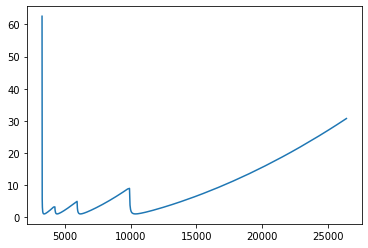

In [4]:
import matplotlib.pyplot as plt
plt.plot(df.iloc[:,0],df.iloc[:,1])

# creating data for model

In [5]:
# Adding noise to analytical data for the model
# for unstable data
noise = np.random.uniform(0,20,[df.shape[0],1])
# for stable data
noise2 = -1*np.random.uniform(0,10,[df.shape[0],1])
print(noise.max())
noise.min()

19.982285532013904


0.019440302337243587

### creating labels 0 for unstable data and 1 for unstable

In [6]:
b_n = df["b"]+noise[:,0]
y_n = np.zeros(df.shape[0])
#stable data creating
b_p = df["b"]+noise2[:,0]
y_p = np.ones(df.shape[0])

df1 = pd.DataFrame({"N":df["N"].values,"b":b_n,"y":y_n})
df2 = pd.DataFrame({"N":df["N"].values,"b":b_p,"y":y_p})

# stack the two DataFrames
df_f = pd.concat([df1,df2], ignore_index=True, axis=0)
df_f

,N,b,y
0,3268.5,71.623851,0.0
1,3281.5,14.713692,0.0
2,3294.6,10.109492,0.0
3,3307.7,21.789129,0.0
4,3320.7,6.742243,0.0
...,...,...,...
1495,26269.0,23.712808,1.0
1496,26308.0,26.019512,1.0
1497,26348.0,20.790654,1.0
1498,26388.0,26.893177,1.0


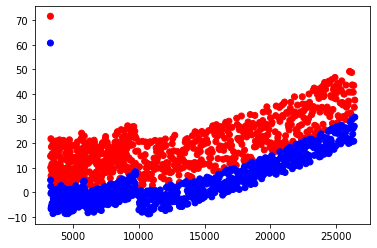

In [13]:
#plt.scatter(df_f["N"],df_f["b"])
import seaborn as sns
# Unique category labels: 'D', 'F', 'G', ...
color_labels = df_f['y'].unique()

# List of RGB triplets
#rgb_values = sns.color_palette("Set2", 8)
rgb_values = ["red","blue"]

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

# Finally use the mapped values
plt.scatter(df_f["N"],df_f["b"], c=df_f['y'].map(color_map))


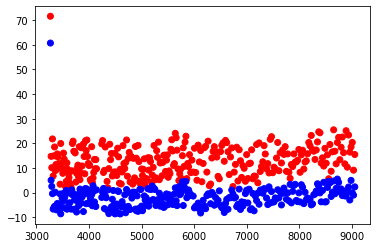

In [19]:
plt.scatter(df_f.loc[0:300,"N"],df_f.loc[0:300,"b"], c=df_f.loc[0:300,'y'].map(color_map))
plt.scatter(df_f.loc[750:1050,"N"],df_f.loc[750:1050,"b"], c=df_f.loc[750:1050,'y'].map(color_map))

In [22]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( df_f[["N","b"]], df_f["y"], test_size=0.33, random_state=42)

# Implimenting online learning Approch
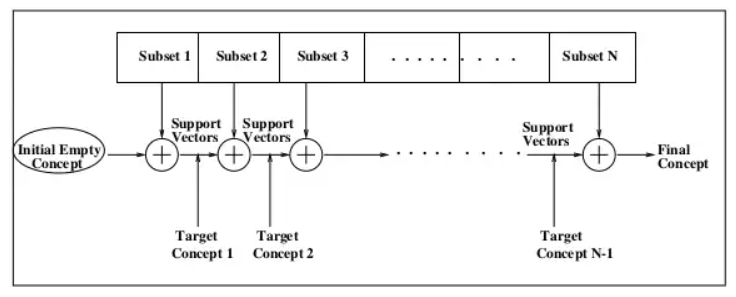

* partial_fit helps us to retrain our model

In [ ]:
# Import necessary packages
from sklearn.linear_model import SGDClassifier
import pandas as pd
from sklearn import linear_model
import sklearn


from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()


data = X_train.join(y_train)
for train_df in np.array_split(data, 5):
#     print(train_df)
    X = train_df[["N","b"]]
    Y = train_df['y']
    clf.partial_fit(X, Y, classes=[0,1])

# clf.fit(X_train,y_train)

### if some new data comes, we will re-train our model with above approch

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
scaler.fit(X_train)
X_train1 = scaler.transform(X_train)
X_test1 = scaler.transform(X_test)

clf1 = MLPClassifier(hidden_layer_sizes = (5,2),solver = 'sgd',learning_rate_init = 0.001,max_iter=1000)

clf1.fit(X_train1,y_train)


MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000, solver='sgd')

In [24]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.04     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("N",fontsize=15)
    plt.ylabel("b",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

## implimenting linear SVM(Support-Vector-Machine)

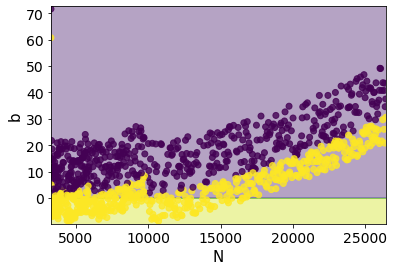

In [23]:
from sklearn.naive_bayes import BernoulliNB

from sklearn.preprocessing import StandardScaler
#0.2
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
plt.figure()
plot_decision_boundaries(X_train,y_train, BernoulliNB)
plt.show()

### standardize the data and then trying !

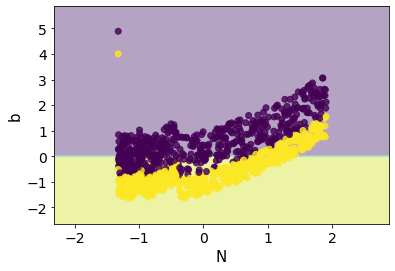

In [25]:
from sklearn.naive_bayes import BernoulliNB

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train1 = scaler.transform(X_train)
plt.figure()
plot_decision_boundaries(X_train1,y_train, BernoulliNB)
plt.show()

## Implementing Neural Network

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train1 = scaler.transform(X_train)

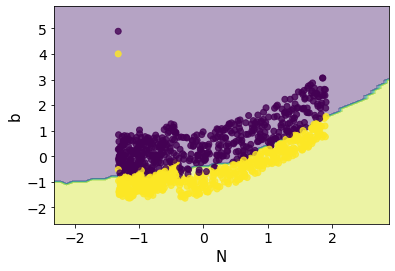

In [44]:
from sklearn.neural_network import MLPClassifier

plt.figure()
plot_decision_boundaries(X_train1,y_train, MLPClassifier, hidden_layer_sizes = (5,2),solver = 'sgd',learning_rate_init = 0.001,max_iter=1000)
plt.show()

## linear SVM accuracy - 71.31 %

In [28]:
y_pred = clf.predict(X_test)
# print(y_test)
# print(y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7131313131313132

## Neural Network accuracy - 96%

In [49]:
y_pred = clf1.predict(X_test1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9676767676767677